In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
#reading the data
loan_dataset = pd.read_csv("loan.csv")

In [3]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
loan_dataset.shape

(39717, 111)

#### Cleaing the data
Find columns with Null values

In [5]:
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Drop the Null value columns 

In [6]:
loan_dataset.dropna(axis = 1, how = 'all', inplace = True)
loan_dataset.shape

(39717, 57)

#### There are several columns having single value, they are not going to useful for the analysis, so drop them.

In [7]:
loan_dataset.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,0.00


In [8]:
loan_dataset.shape

(39717, 49)

#### There are 49 columns left, out of which several are not relevant for the analysis, so we need to remove them.
Following columns can be removed :
"id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc"

In [9]:
loan_dataset.drop(["member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc"], axis = 1, inplace = True)

In [10]:
loan_dataset.shape

(39717, 41)

#### Now we have 40 columns , lets see if we can remove more colums that are irrelevant

Since we're focusing on the loan application which can possibly default before the loan is disbersed, we can discard those
columns which are post loan approval related.

Here are the list :
"delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
"collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"


In [11]:
loan_dataset.drop(["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
"collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_dataset.shape

(39717, 26)

#### Now we have 25 columns, lets see if we can remove any more that are irrelevant.

Following columns can be removed since they are not related to loan applicant :
"out_prncp_inv" , "total_pymnt_inv" 


In [12]:
loan_dataset.drop(["out_prncp_inv" , "total_pymnt_inv" ], axis = 1, inplace = True)
loan_dataset.shape

(39717, 24)

In [13]:
loan_dataset.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### Need to find the null and missing values

In [14]:
null_percent = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2)
null_percent[ null_percent > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

#### Need to remove the the null valued rows in the above columns.

In [15]:
loan_dataset.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_percent = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2)
null_percent[ null_percent > 0 ]

Series([], dtype: float64)

From loan_status column we can remove the Current loan type since it pertains to ongoing loans, we need to focus on Fully Paid and Charged Off loans

In [16]:
loan_dataset = loan_dataset[loan_dataset.loan_status != 'Current']

In [17]:
#term column has only 2 values, trim spaces
loan_dataset.term.unique()
loan_dataset['term'] = loan_dataset.term.str.strip()
loan_dataset.term.unique()

array(['36 months', '60 months'], dtype=object)

In [18]:
loan_dataset.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [19]:
#int_rate and revol_util need to be converted to numeric datatype
loan_dataset['int_rate'] = loan_dataset.int_rate.str.strip('%').astype(float)
loan_dataset['revol_util'] = loan_dataset.revol_util.str.strip('%').astype(float)
loan_dataset.emp_length = pd.to_numeric(loan_dataset.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [20]:
loan_dataset.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [21]:
#converting to date type
loan_dataset['issue_d'] = pd.to_datetime(loan_dataset.issue_d, format='%b-%y')

Create Derived Variables

In [22]:
loan_dataset['issue_d_year'] = loan_dataset.issue_d.dt.year
loan_dataset['issue_d_month'] = loan_dataset.issue_d.dt.strftime('%b')
loan_dataset['issue_d_weekday'] = loan_dataset.issue_d.dt.weekday
loan_dataset['approved_loan_amnt_ratio'] = round(loan_dataset.funded_amnt_inv*100/loan_dataset.loan_amnt,2)

In [23]:
loan_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,0.00,2011,Dec,3,99.50
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,0.00,2011,Dec,3,100.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,0.00,2011,Dec,3,100.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,Feb-96,1,10,0,21.00,37,0.00,2011,Dec,3,100.00
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,0.00,2011,Dec,3,100.00


## Perform Univariate Analysis

Loan Amount

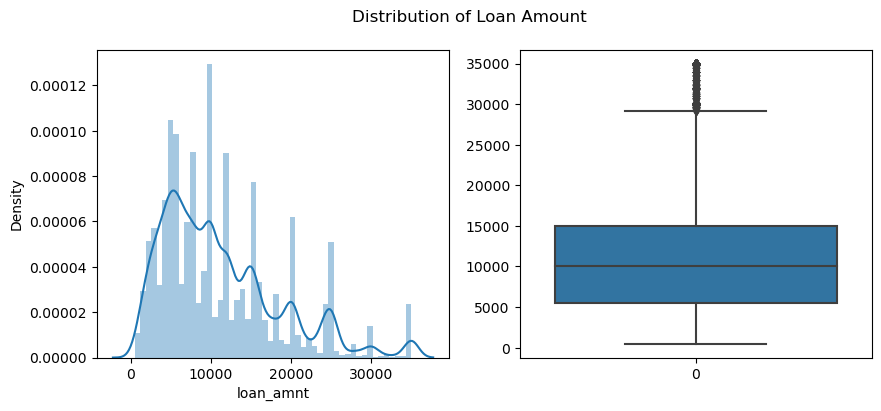

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_dataset.loan_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=loan_dataset.loan_amnt)
plt.suptitle('Distribution of Loan Amount ')
plt.show()

In [25]:
loan_dataset.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

Observation : From the above plot we can see that most people took a loan amount of 10000 and only few took loan > 30000 

### Interest Rate

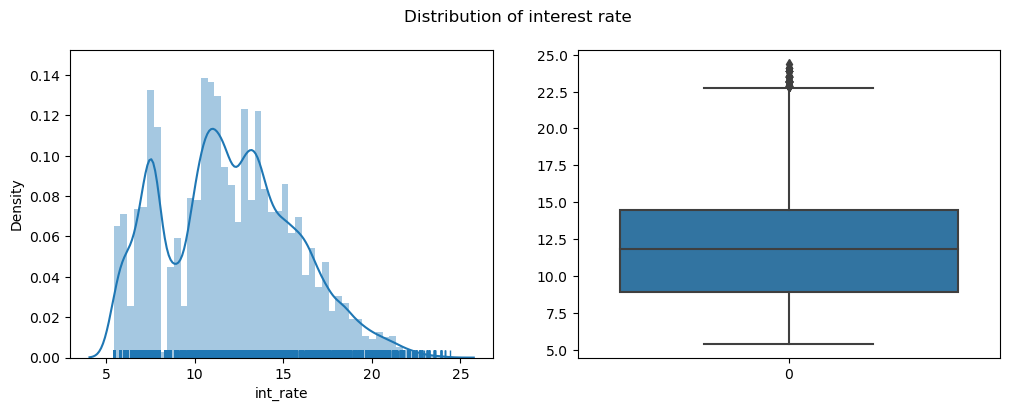

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_dataset.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_dataset.int_rate)
plt.suptitle('Distribution of interest rate ')
plt.show()

Observation : From the above plots we can see that most of the interest rates lies between 9% to 14.5%. Few people took loan at higher rates of interest i.e., 22.5%

### Installment

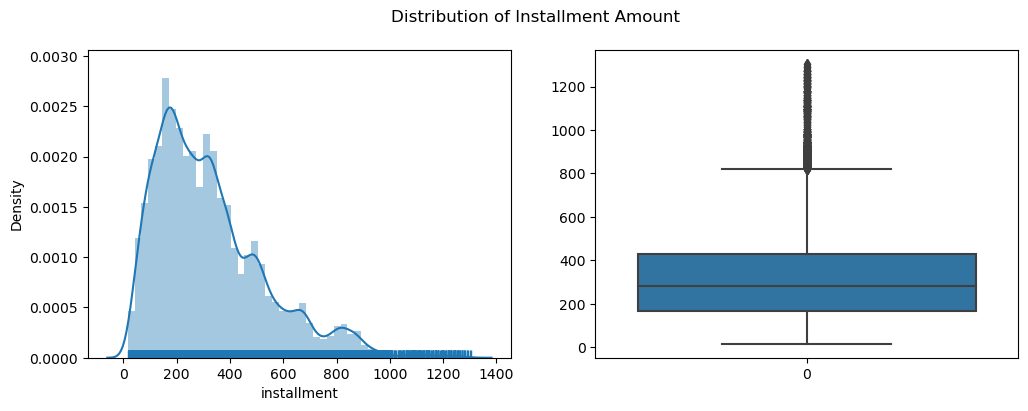

In [27]:
installment = loan_dataset.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Distribution of Installment Amount ')
plt.show()

Observation : Most people have installment amount of 280 

### funded_amnt
The total amount committed to that loan at that point in time.


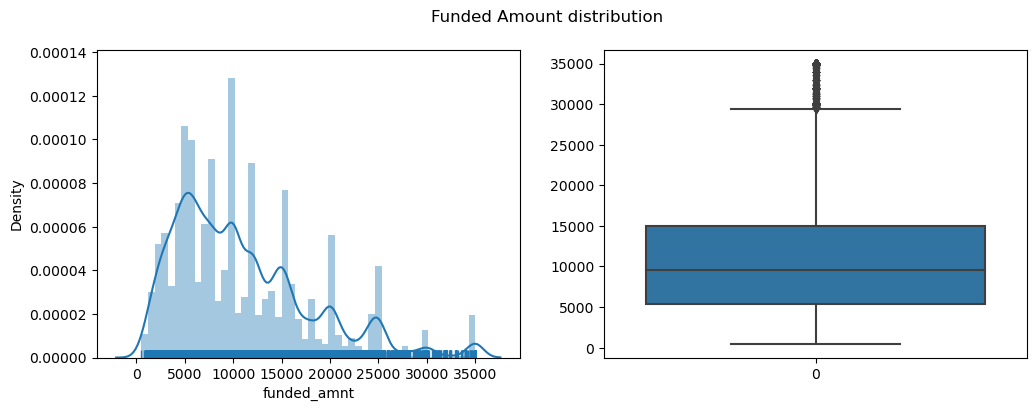

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_dataset.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_dataset.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

Observation:
Funded amount data indicates that Lending club approved most of Applied loan amount.

### funded_amnt_inv
The total amount committed by investors for a given loan at that time.

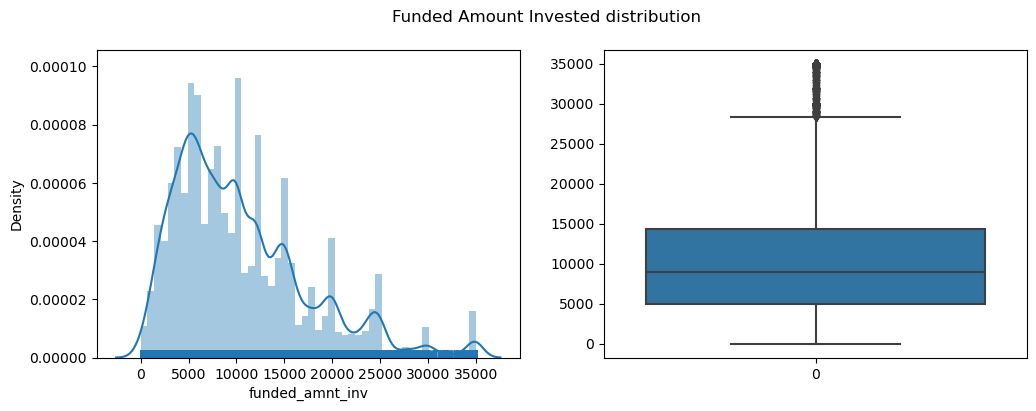

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_dataset.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_dataset.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

### Term

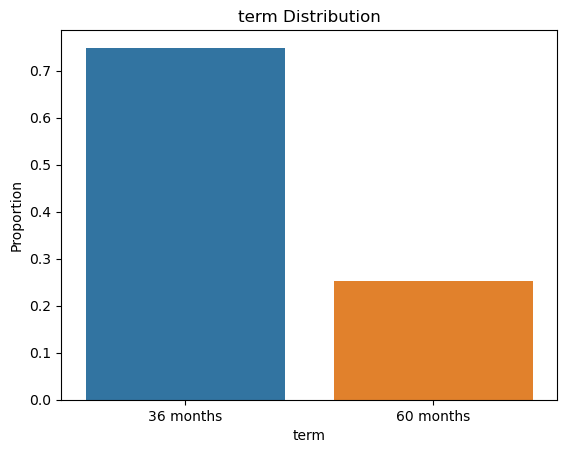

In [30]:
var = 'term'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation :Borrowers have taken 36 months tenure more than 60 months.

### Grade

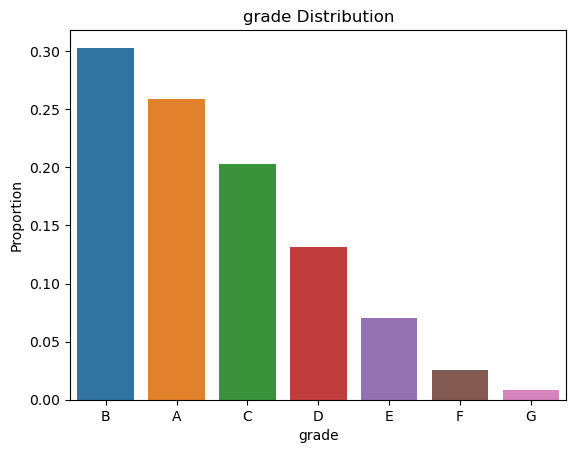

In [31]:
var = 'grade'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation: Most borrowers fall under A and B grades then other grades

### Employment length

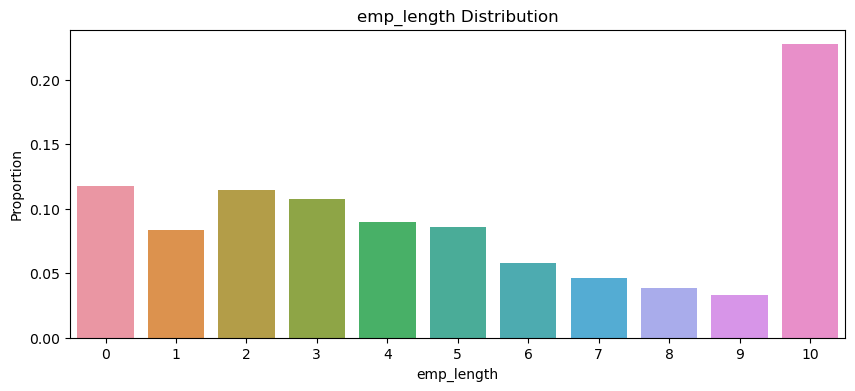

In [32]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation:Borrowers are mostly 10+ years emploment length.

### Home Ownership

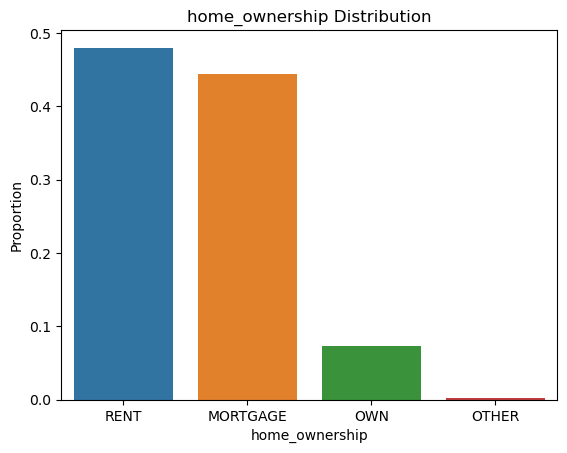

In [33]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

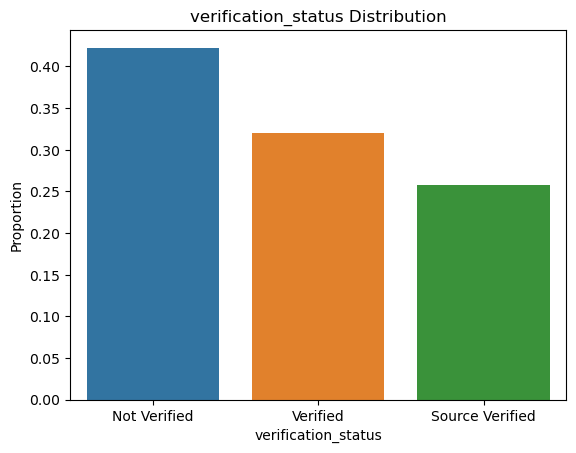

In [34]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observation:Majority of loans were given without verification of applicants income.

### Loan Status

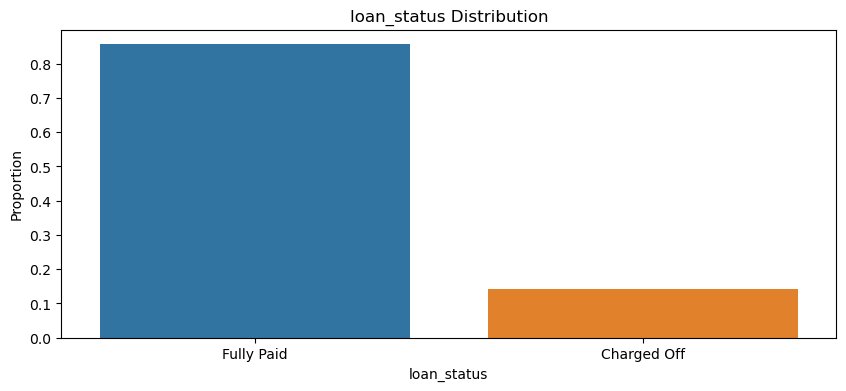

In [35]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_dataset[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:85% of borrowers has paid the loan fully, whereas 15% has defaulted the loan.

## Segmented Univariate Analysis

### Loan Amount

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

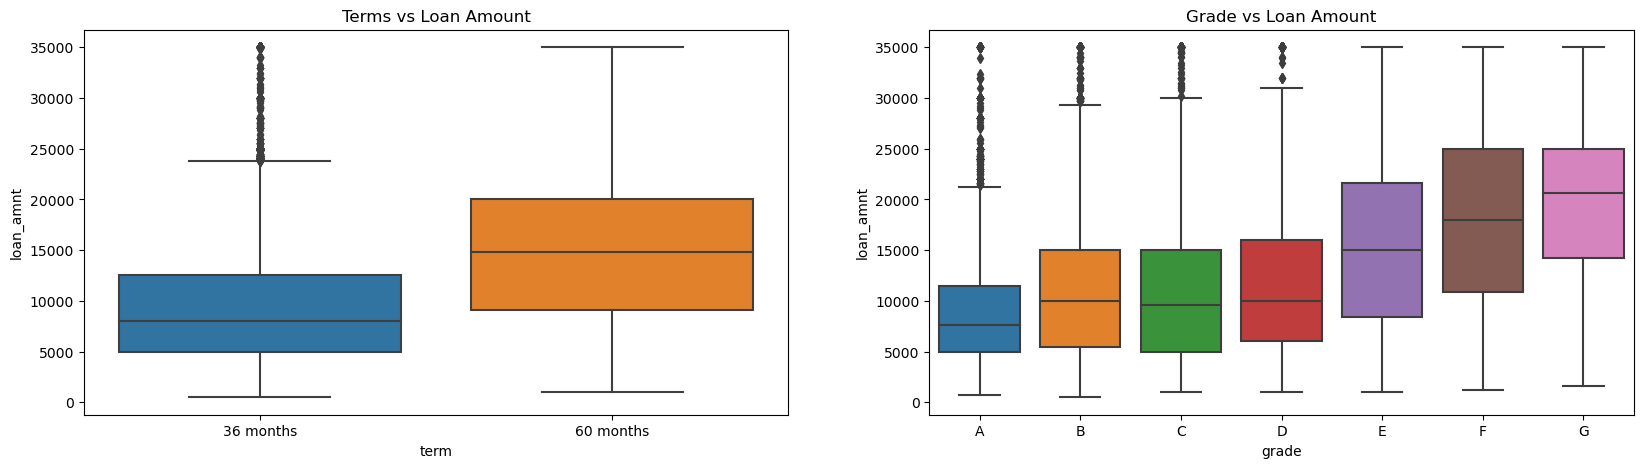

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_dataset.loan_amnt, data=loan_dataset)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_dataset.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_dataset.loan_amnt, order = grade_ord, data=loan_dataset)

Observations:
Amount of loan increases with tenure, in this case loan amount is higher for 60 months tenure.  
Grade 'F' and 'G' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

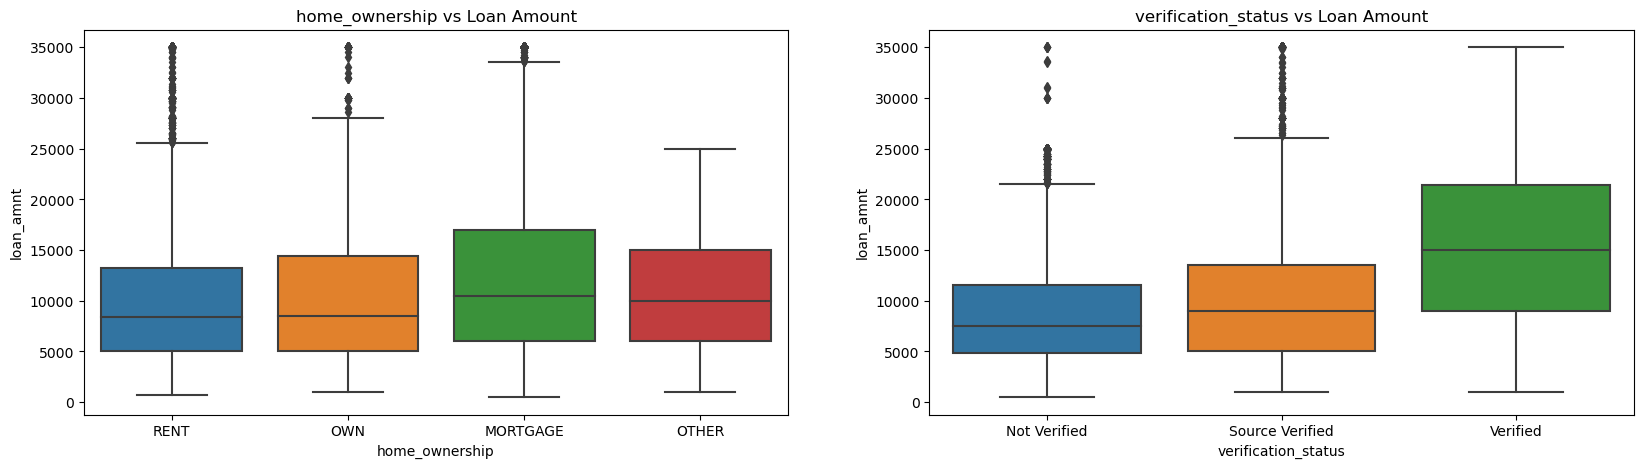

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_dataset.loan_amnt, data=loan_dataset)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_dataset.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_dataset.loan_amnt, order = verification_status_ord, data=loan_dataset)

Observations:
More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

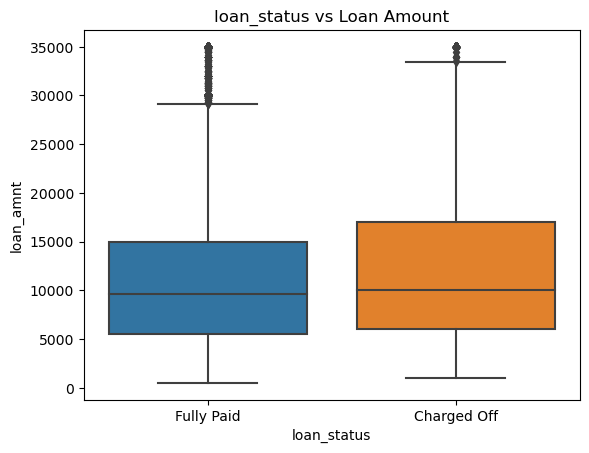

In [38]:
sns.boxplot(x='loan_status', y=loan_dataset.loan_amnt, data=loan_dataset)
plt.title('loan_status vs Loan Amount')

Observation:
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

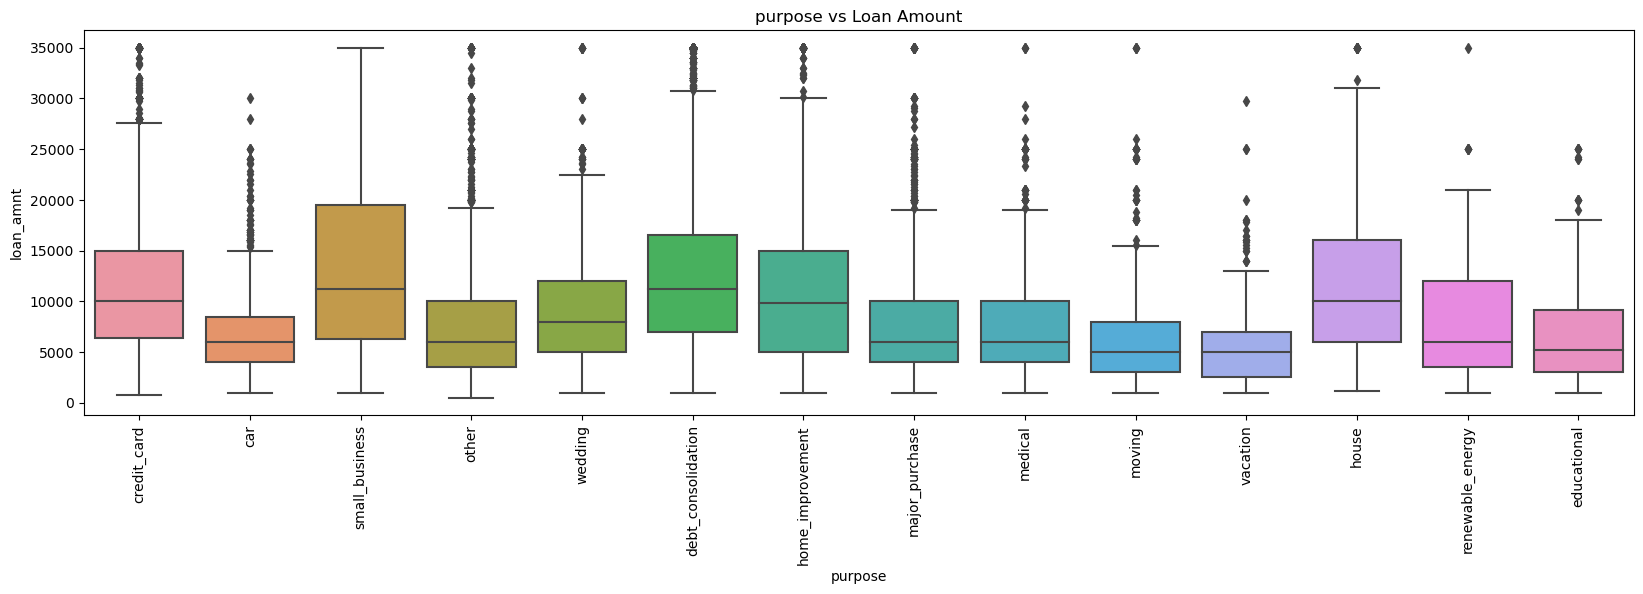

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_dataset.loan_amnt, data=loan_dataset)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

Observations:  
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

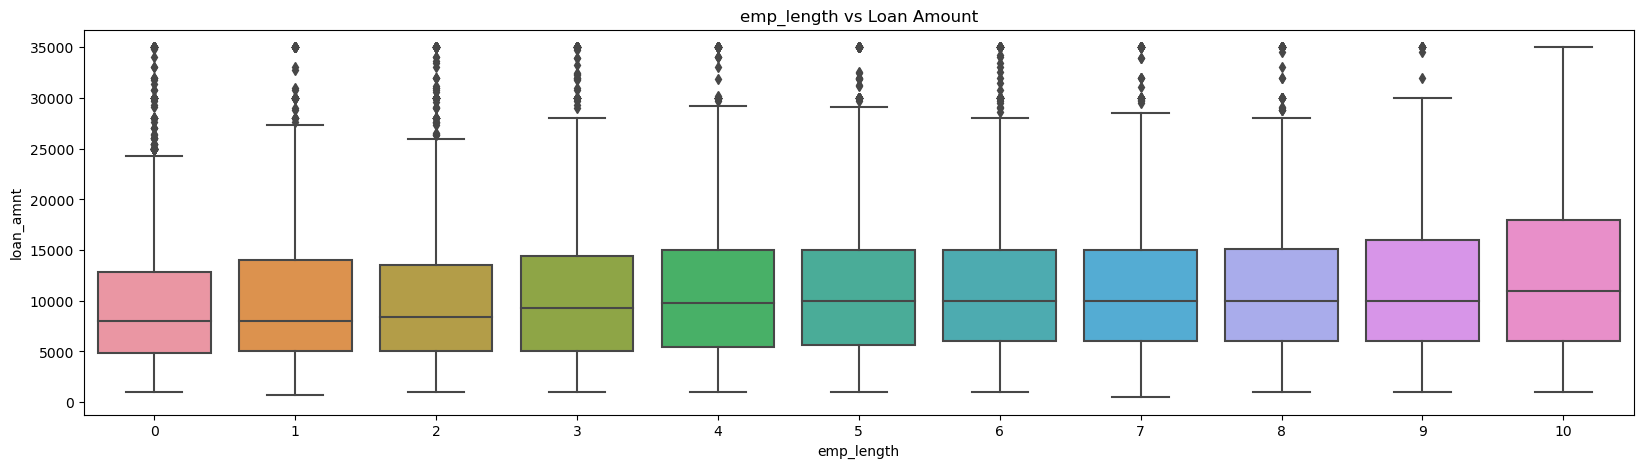

In [40]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_dataset.loan_amnt, data=loan_dataset)
plt.title('emp_length vs Loan Amount')

Observations:  
More borrowers are from 10+ years and least is <1 year

### funded_amnt

<Axes: title={'center': 'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

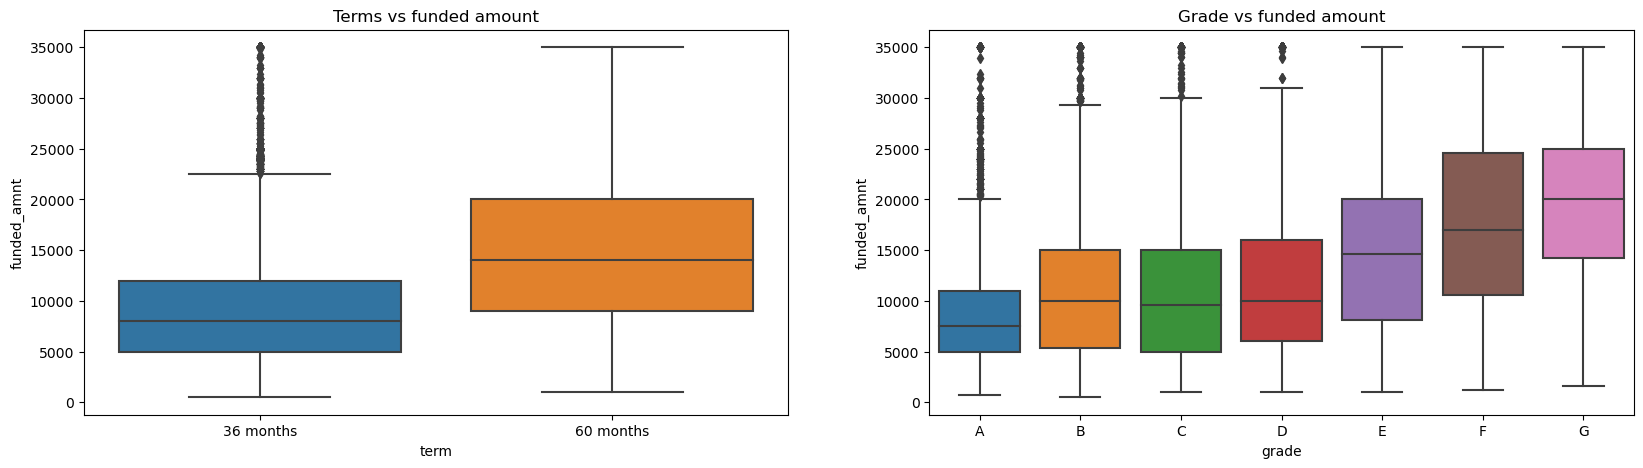

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_dataset.funded_amnt, data=loan_dataset)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = loan_dataset.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_dataset.funded_amnt, order = grade_ord, data=loan_dataset)

Observations: Higher the tenure, higher is the Funded amount. With lesser grades (F&G) funded amount increases. 

Text(0.5, 1.0, 'loan_status vs Funded amnt')

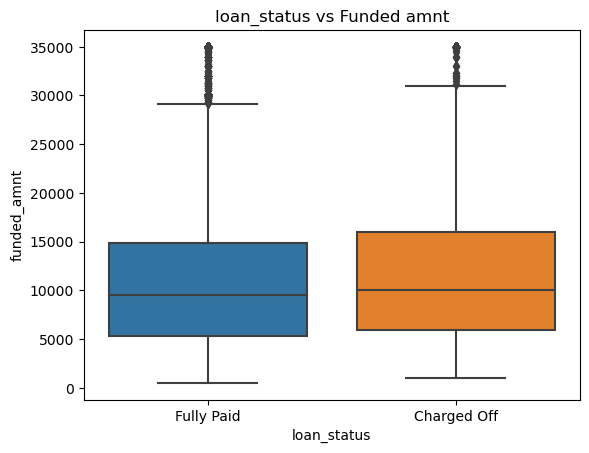

In [42]:
sns.boxplot(x='loan_status', y=loan_dataset.funded_amnt, data=loan_dataset)
plt.title('loan_status vs Funded amnt')

Observation: For charged off loans funded amount was relatively higher.

### int_rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

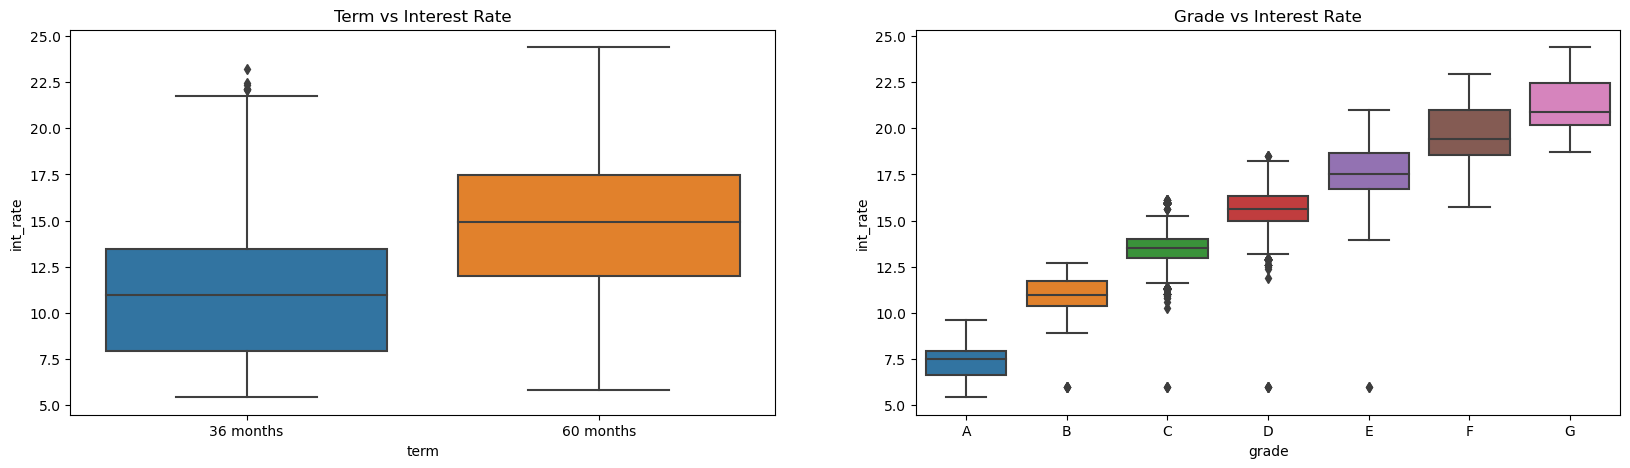

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_dataset.int_rate, data=loan_dataset)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_dataset.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_dataset.int_rate, order = grade_ord, data=loan_dataset)

Observation:  
The interest rates are higher for higher tenure loans.  
Interest rates are increasing when grades are lowering (A to G).

Text(0.5, 1.0, 'loan_status vs Interest Rate')

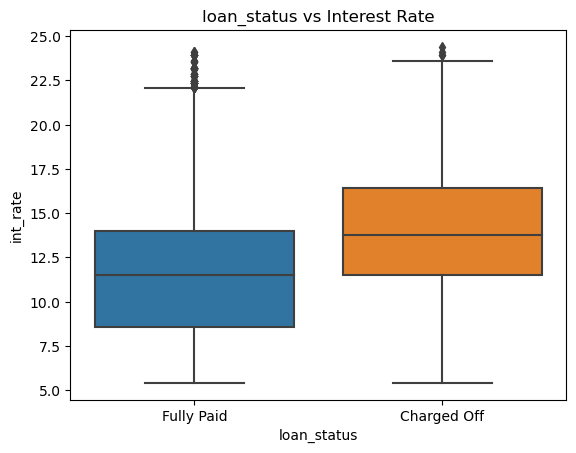

In [44]:
sns.boxplot(x='loan_status', y=loan_dataset.int_rate, data=loan_dataset)
plt.title('loan_status vs Interest Rate')

Observation:  
We can clearly see that, greater the interest rate more the chance of defaulting the loan.

## Bivariate Analysis

### Term vs Loan Status

Text(0.5, 1.0, 'Term vs Loan status')

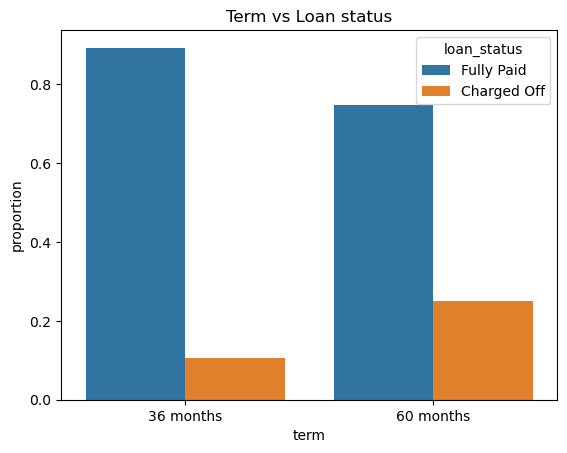

In [45]:
#Proportion of values for each category
df = loan_dataset.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

Observations:  
More proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

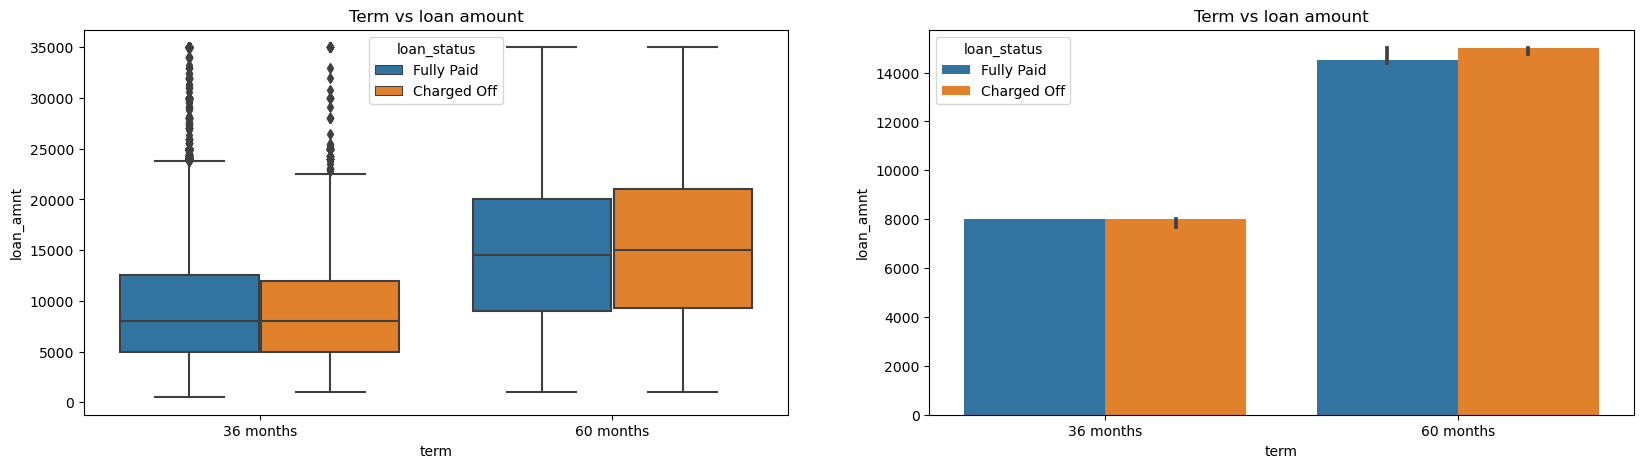

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_dataset)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_dataset, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

Observation:  
Loan amount is not the deciding factor for defaults in both 36 and 60 months term.   
Borrowers have equal distribtion in both default and non default for 36 and 60 months term.

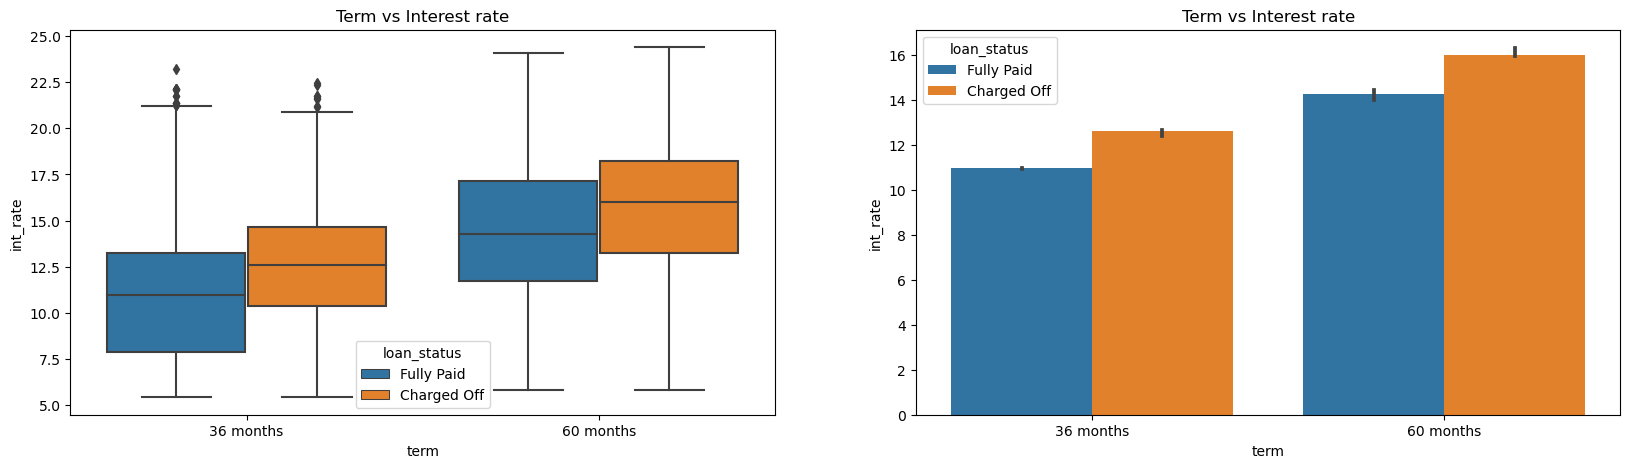

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_dataset)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_dataset, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

Observation :  
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

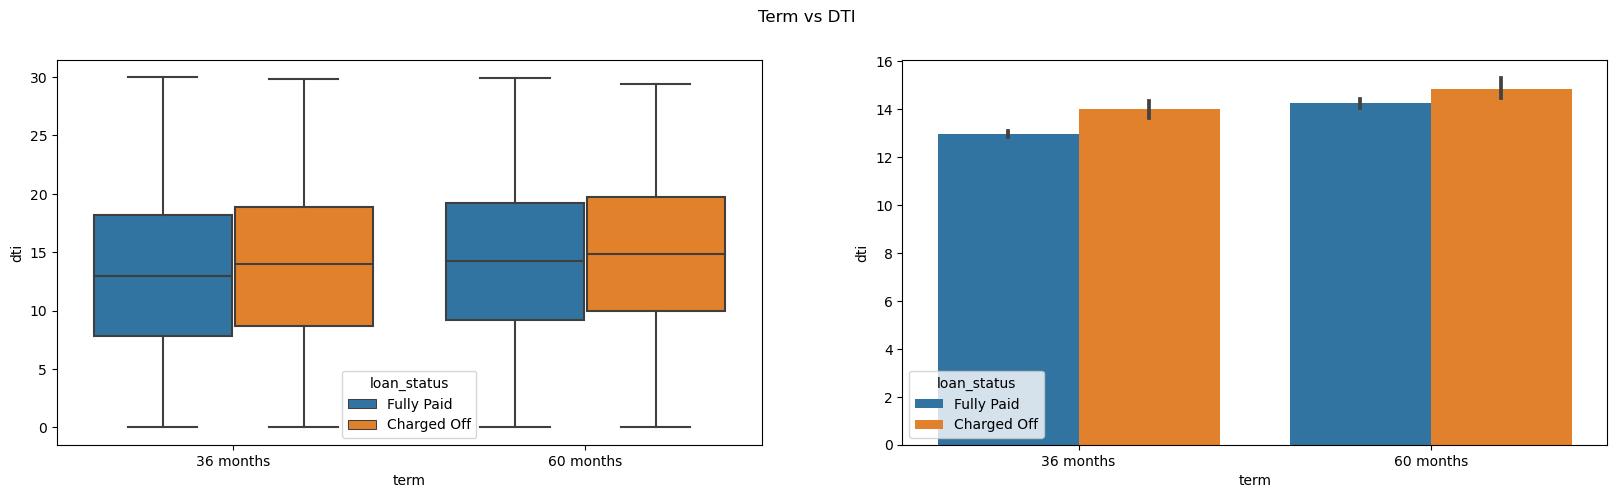

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_dataset)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_dataset, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

Observation: 
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

### Grade

In [51]:
#Sorting Grades from A to G
grade_ord = loan_dataset.grade.unique()
grade_ord.sort()

Text(0.5, 1.0, 'Grade vs Loan status')

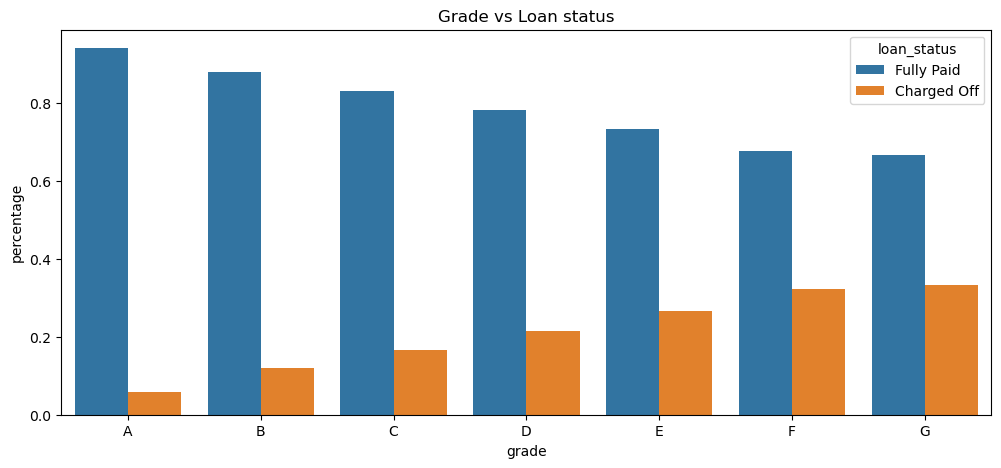

In [52]:
df = loan_dataset.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

Observation:
The above graph clearly shows that the Charged off increases as grades decreases.

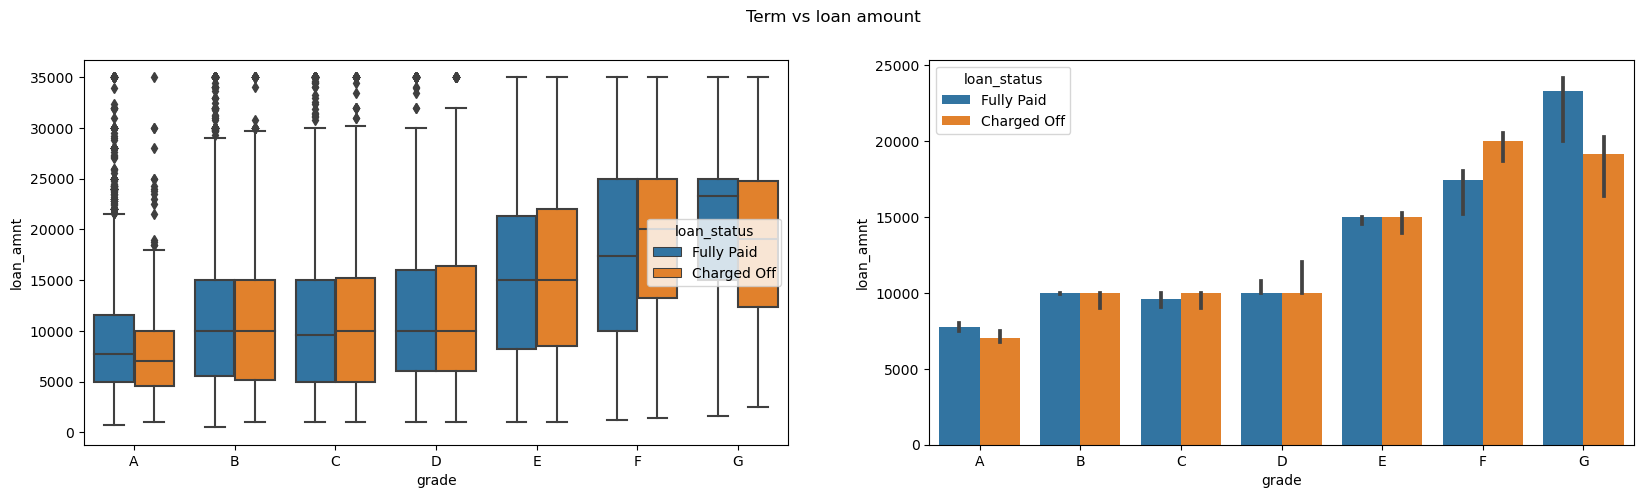

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_dataset, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_dataset, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

Observation:  
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

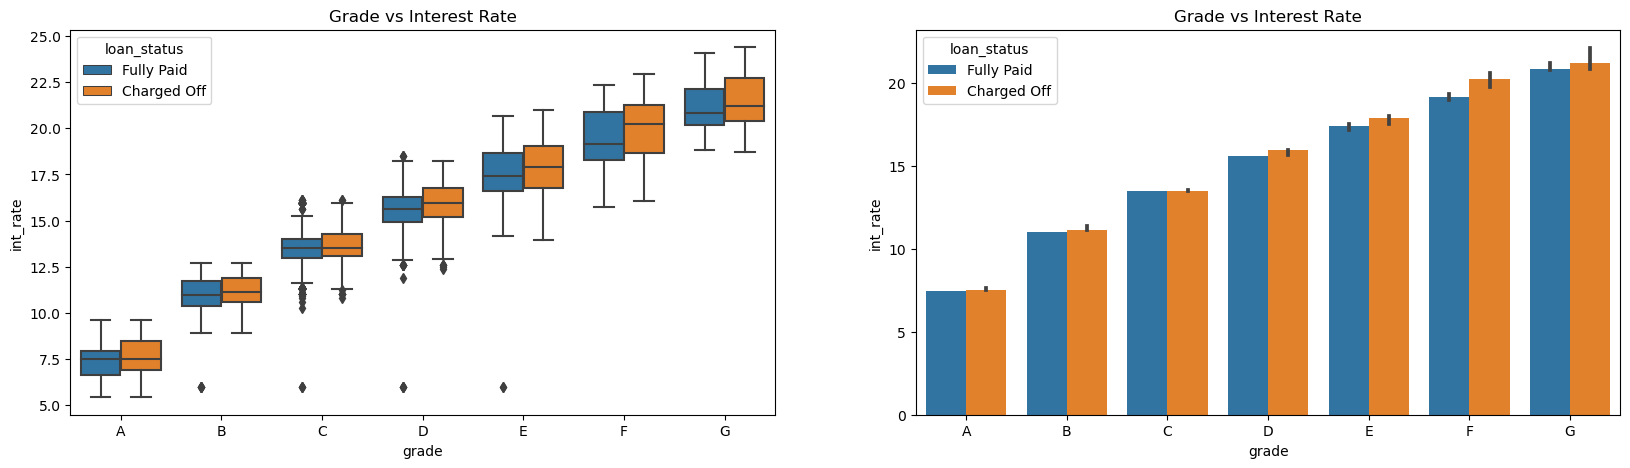

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_dataset, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_dataset, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

Observation:
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

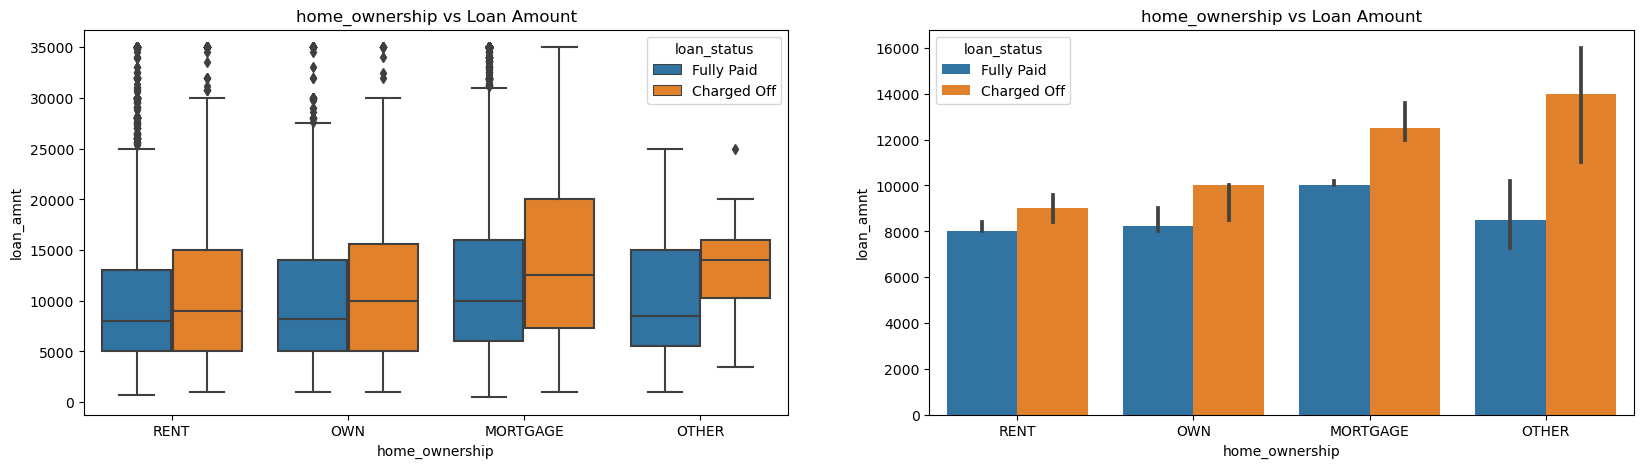

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_dataset)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_dataset, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

Observation:
Borrowers who took higher loan amounts defaulted more than others.

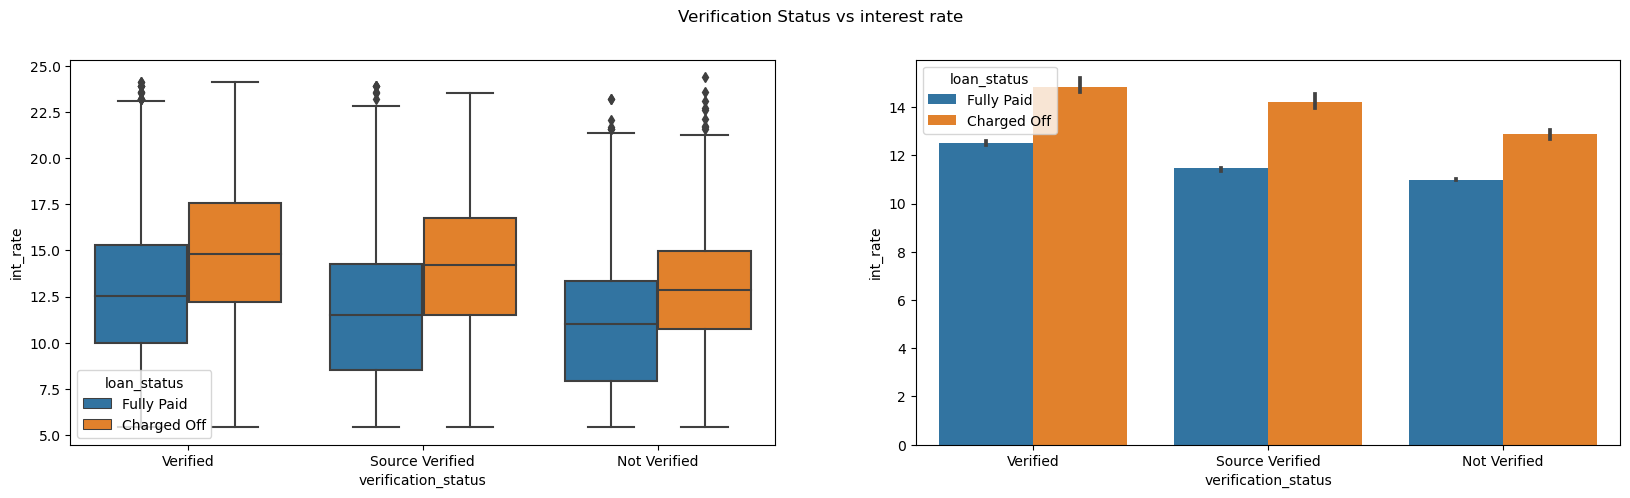

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_dataset)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_dataset, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

Observations: 
Irrespective of verification status higher interest rates are incurring default of loan.

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

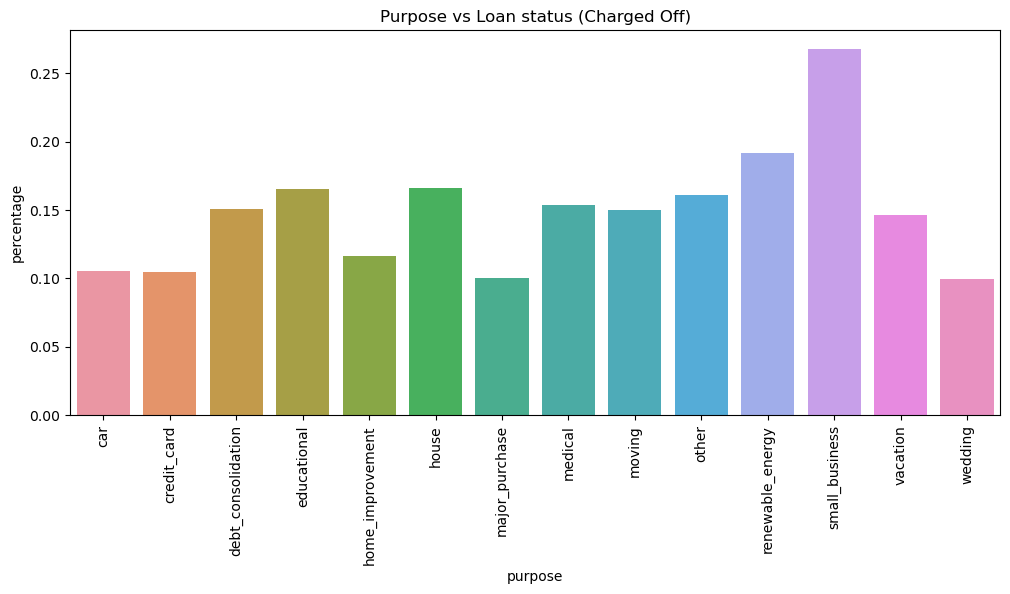

In [57]:
df = loan_dataset.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

Observation:
Charged-off are higher for small_business comparitively.

<Figure size 640x480 with 0 Axes>

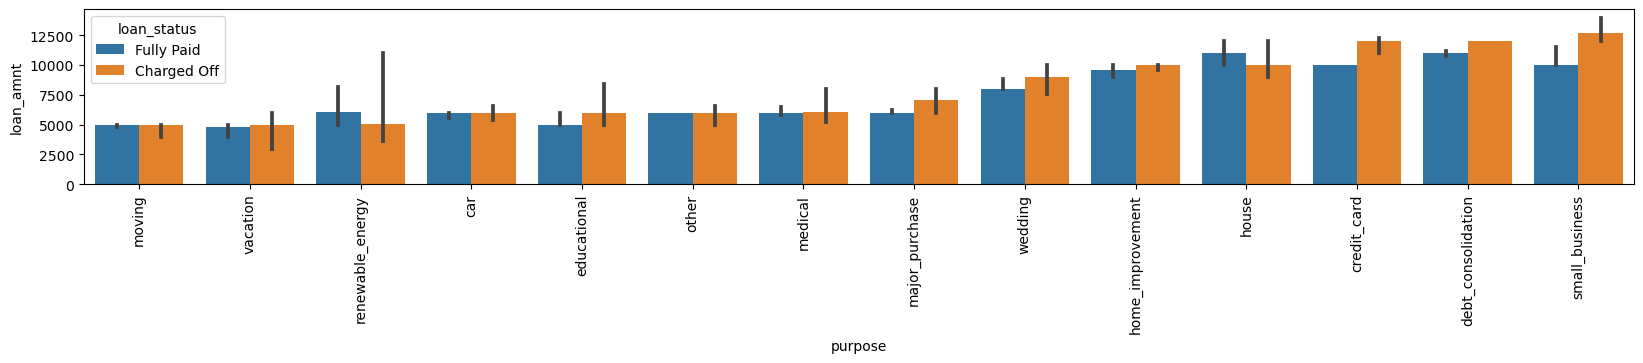

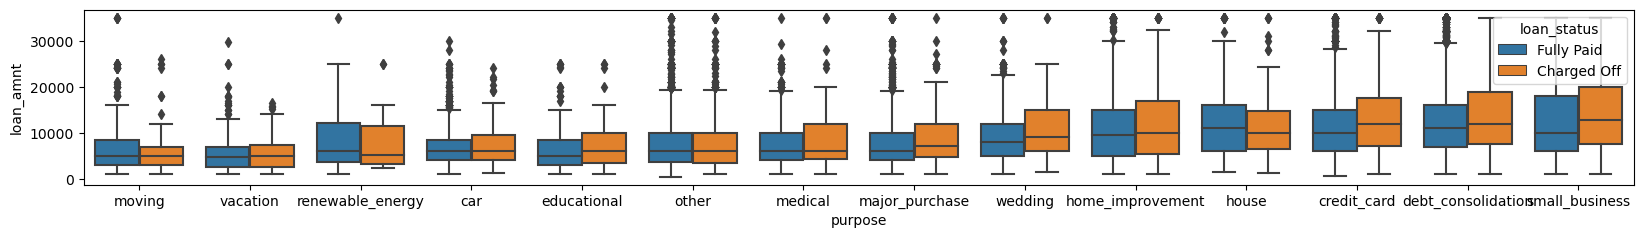

In [58]:
df = loan_dataset.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_dataset, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_dataset, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

Observations:
Small Business has more defaults when the loan amount is also high.